In [ ]:
from accelrod.benchmark import (
    benchmark_GEMM,
    to_pandas,
    plot_result,
    get_gpu_free_memory,
    get_power_of_two_sequence,
)
import torch
import numpy as np

In [ ]:
# convert MB to bytes
total_free_bytes = get_gpu_free_memory() * 0.8 * 1024**2
# temporary assume benchmarking start with float64 so 8 bytes
max_n = np.sqrt(total_free_bytes / 5 / 8)
# 3 * (n**2) * 8

In [3]:
max_n

np.float64(7517.861823683646)

In [4]:
# Example usage
# Using your existing max_n value
sequence = get_power_of_two_sequence(max_n)
print(f"Powers of 2 up to {max_n}: {sequence}")

Powers of 2 up to 7517.861823683646: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]


In [5]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 980'

In [ ]:
multiplier = 4
result = []
for n in sequence:
    # for n in [1024]:
    result.append(
        benchmark_GEMM(
            matrix_shape=(1024 * multiplier, n, 1024 * multiplier),
            dtype=torch.float64,
            number=20,
        )
    )

device is None, automatically set to cuda
dtype is torch.float64, bytes_per_element: 8
matrix shape: (4096, 1, 4096)


cuda:0
cuda:0
2431.0
tflops: 0.009386051096994405, x: 0.0035749253496760503, arithmetic_intensity: 0.24987798926305516
device is None, automatically set to cuda
dtype is torch.float64, bytes_per_element: 8
matrix shape: (4096, 2, 4096)
cuda:0
cuda:0
2140.0
tflops: 0.012372440168761958, x: 0.0054240604993538, arithmetic_intensity: 0.4995121951219512
device is None, automatically set to cuda
dtype is torch.float64, bytes_per_element: 8
matrix shape: (4096, 4, 4096)
cuda:0
cuda:0
2140.0
tflops: 0.025057775653417685, x: 0.0053563305002171544, arithmetic_intensity: 0.9980506822612085
device is None, automatically set to cuda
dtype is torch.float64, bytes_per_element: 8
matrix shape: (4096, 8, 4096)
cuda:0
cuda:0
2140.0
tflops: 0.050905073438115095, x: 0.005273255451174919, arithmetic_intensity: 1.9922178988326849
device is None, automatically set to cuda
dtype is torch.float64, bytes_per_element: 8
matrix shape: (4096, 16, 4096)
cuda:0
cuda:0
2140.0
tflops: 0.07484894003193247, x: 0.0071727

In [7]:
df = to_pandas(result)

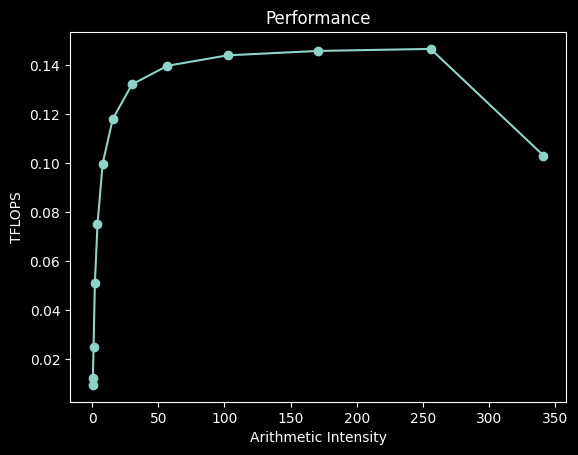

In [8]:
plot_result(df)